In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
train_path = 'Brain Tumor Data Set'

In [3]:
folders = glob('Brain Tumor Data Set\*')

In [4]:
folders

['Brain Tumor Data Set\\Brain Tumor', 'Brain Tumor Data Set\\Healthy']

In [5]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [6]:
train = train_datagen.flow_from_directory("Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 4600 images belonging to 2 classes.


In [7]:
val = test_datagen.flow_from_directory("Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               subset = "validation")


Found 0 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [9]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = 'BinaryCrossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
history = model.fit(train,verbose=1,epochs=20)

Epoch 1/20


18/18 [==============================] - 53s 3s/step - loss: 0.7474 - accuracy: 0.6109
Epoch 2/20
18/18 [==============================] - 49s 3s/step - loss: 0.5412 - accuracy: 0.7363
Epoch 3/20
18/18 [==============================] - 47s 3s/step - loss: 0.4383 - accuracy: 0.8104
Epoch 4/20
18/18 [==============================] - 49s 3s/step - loss: 0.3682 - accuracy: 0.8391
Epoch 5/20
18/18 [==============================] - 44s 2s/step - loss: 0.3493 - accuracy: 0.8502
Epoch 6/20
18/18 [==============================] - 39s 2s/step - loss: 0.3297 - accuracy: 0.8600
Epoch 7/20
18/18 [==============================] - 39s 2s/step - loss: 0.2772 - accuracy: 0.8876
Epoch 8/20
18/18 [==============================] - 40s 2s/step - loss: 0.2639 - accuracy: 0.8900
Epoch 9/20
18/18 [==============================] - 39s 2s/step - loss: 0.2291 - accuracy: 0.9098
Epoch 10/20
18/18 [==============================] - 39s 2s/step - loss: 0.2176 - accuracy: 0.9167
Epoch 11/20
18/18

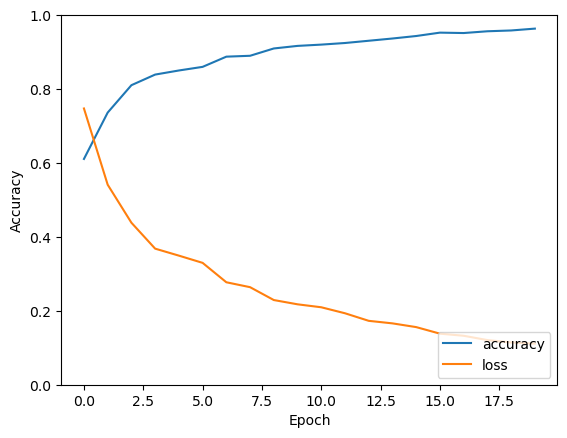

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')